In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [2]:
measures = ["alpha", "gradient", "test-error", "seeger-bound"]
methods = ["1", "2", "exact", "MC"]
bounds = ["mcallester", "seeger"]
opt = [True, False]

In [6]:
def load_results(load_dir):
    
    load_dir = Path(load_dir)
    all_files = load_dir.rglob("*.csv")

    results = {m: {f'{met}-opt-{o}': {} for o in opt for met in methods} for m in measures}
    for f in all_files:

        for mea in measures:
            for met in methods: 
                for o in opt:

                    match = re.search(f'.*run-{met}_.*_optimize-bound={o}_.*_{mea}.*.csv', str(f))
                    if match is not None:
                        results[mea][f'{met}-opt-{o}'] = np.loadtxt(f, delimiter=",", skiprows=1)
                        
    return results

# Normals

In [7]:
dataset = "normals"
results = load_results(f"../results/{dataset}/analysis/")

In [8]:
iters = len(results["alpha"]["exact-opt-True"])

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

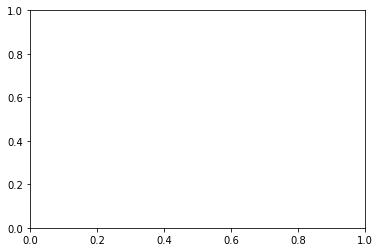

In [10]:
for met in ["MC"]: 
    for o in opt:
        plt.plot(np.arange(iters), results["alpha"][f'{met}-opt-{o}'][:,-1], label=f'{met}-opt-{o}')
        last = round(results["alpha"][f'{met}-opt-{o}'][-1,-1], 2)
        plt.text(1000, last, last)
# plt.yscale("log")
plt.legend()
plt.xlim(0, 1000)
plt.xlabel("GD iterations", fontsize=15)
plt.ylabel(r'$|| \alpha ||_2$', fontsize=15)

plt.savefig("MC-alpha.pdf", bbox_inches="tight")

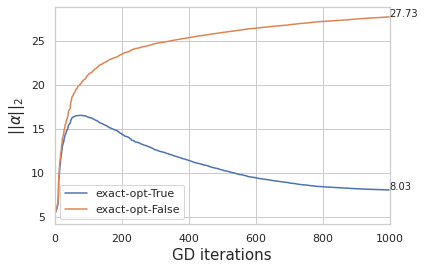

In [112]:
for met in ["exact"]: 
    for o in opt:
        plt.plot(np.arange(iters), results["alpha"][f'{met}-opt-{o}'][:,-1], label=f'{met}-opt-{o}')
        last = round(results["alpha"][f'{met}-opt-{o}'][-1,-1], 2)
        plt.text(1000, last, last)
# plt.yscale("log")
plt.legend()
plt.xlim(0, 1000)
plt.xlabel("GD iterations", fontsize=15)
plt.ylabel(r'$|| \alpha ||_2$', fontsize=15)

plt.savefig("exact-alpha.pdf", bbox_inches="tight")

# Moons

### 10 runs

In [94]:
ms = [4, 8, 16, 32]
methods = ["1", "2", "exact", "MC"]
bounds = ["mcallester", "seeger"]
seeds = "23032021-23032031"

load_dir = Path(f"../results/latest/moons/1000/")

results = {m: {} for m in ms}
for method in methods:
    for M in ms:
        results[M][method] = {}
        for bound in bounds:
            c_dir = load_dir / f"{method}/{bound}/optimize-bound=True/stumps-uniform/M={M}"
            path = next(c_dir.rglob(f"**/lr=0.1/seeds={seeds}/**/*.npy"))
            results[M][method][bound] = np.load(path, allow_pickle=True).item()

In [88]:
def draw_bars(M):
    n = len(methods)
    x_pos = np.arange(n)

    plt.figure(figsize=(15,3))
    for j, y in enumerate(["train-error", "test-error"]):
        ax = plt.subplot(131 + j)
        for i, m in enumerate(methods):
            plt.bar([i, i+n], [results[M][m][b][y][0] for b in bounds], yerr=[results[M][m][b][y][1] for b in bounds], label=m, alpha=0.8)
            plt.ylabel(y)

        ax.set_xticks([1.5, 5.5])
        ax.set_xticklabels(bounds)
        plt.ylim(0, 0.170)
    #     plt.legend()

    ax = plt.subplot(133)
    for i, m in enumerate(methods):
        plt.bar([i, i+n], [results[M][m]["mcallester"]["mcallester"][0], results[M][m]["seeger"]["seeger"][0]], yerr=[results[M][m]["mcallester"]["mcallester"][1], results[M][m]["seeger"]["seeger"][1]], label=m, alpha=0.8)
        plt.ylabel("bound")

#     plt.plot([-0.5, 5.5], [1, 1], linestyle='dashed', c="r")
    ax.set_xticks([1.5, 5.5])
    ax.set_xticklabels(bounds)
    plt.ylim(0, 1)
    plt.xlim(-0.8, 7.8)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle(f"M={M*4}")

    plt.savefig(f"moons-M={M*4}.pdf", bbox_inches="tight")

In [89]:
results[4]["exact"]

{'mcallester': {'train-error': (0.004397572483867407, 2.2747832867288626e-05),
  'test-error': (0.004458905756473541, 0.0002663404400867158),
  'mcallester': (0.12160598635673522, 5.6109242897585306e-05),
  'time': (108.58078286647796, 1.836993444896538)},
 'seeger': {'train-error': (0.00024108583747874945, 2.582601826261838e-06),
  'test-error': (0.00033892101782839745, 0.0002976950322688898),
  'seeger': (0.03285150527954102, 1.5036063644817586e-05),
  'time': (115.14295048713684, 3.9668136891093932)}}

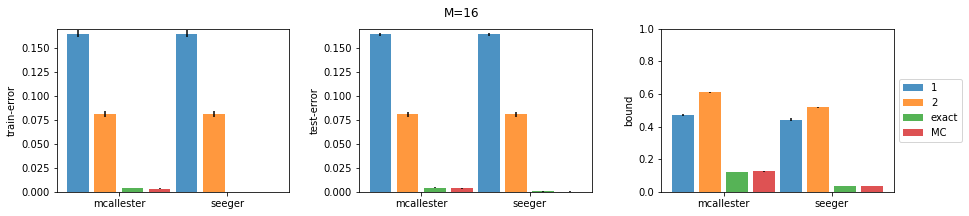

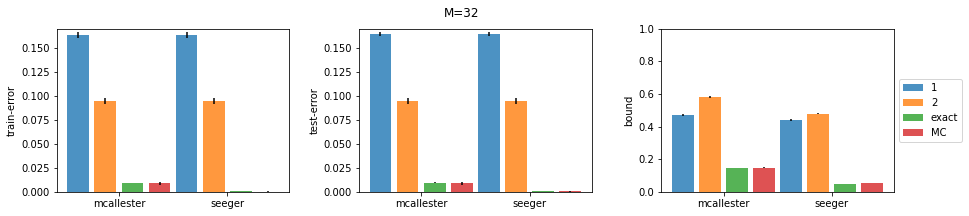

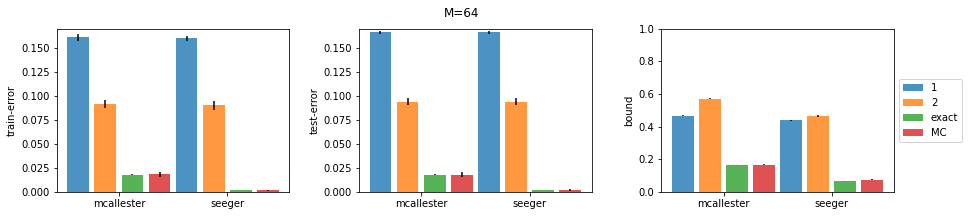

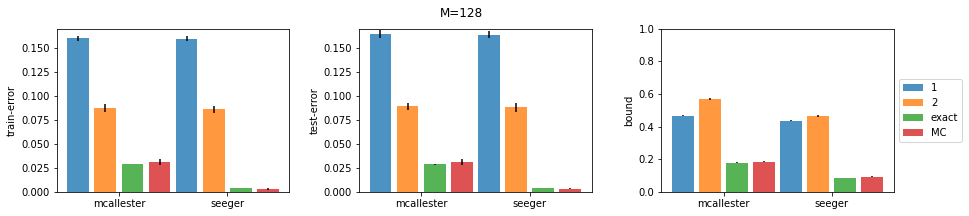

In [90]:
for m in ms:
    draw_bars(m)

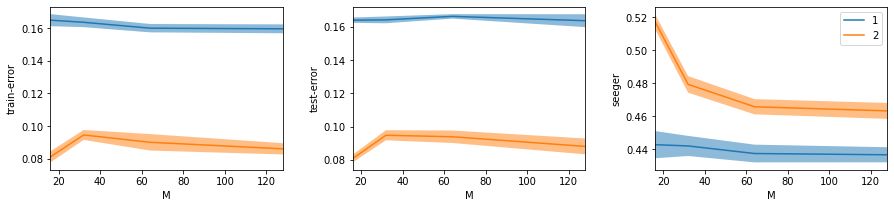

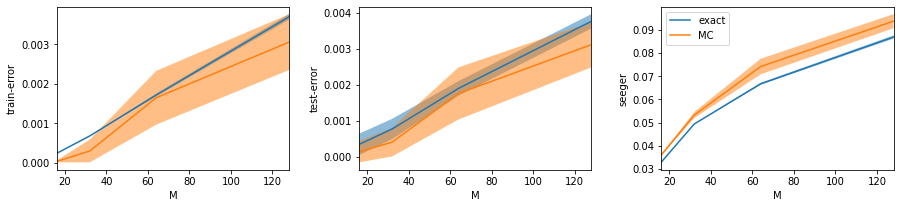

In [95]:
b = "seeger"
plt.figure(figsize=(15,3))

x = [m*4 for m in ms]
for j, e in enumerate(["train-error", "test-error", b]):
    ax = plt.subplot(131 + j)
    for met in ["1", "2"]:
        y = np.array([results[m][met][b][e][0] for m in ms])
        err = np.array([results[m][met][b][e][1] for m in ms])
        plt.plot(x, y, label=met)
        plt.fill_between(x, y-err, y+err, alpha=0.5)
    plt.xlim(min(ms)*4, max(ms)*4)    
    plt.ylabel(e)
    plt.xlabel("M")

plt.subplots_adjust(wspace=0.3)
plt.legend()
plt.savefig(f"moons-all-M-oracle.pdf", bbox_inches="tight")

b = "seeger"
plt.figure(figsize=(15,3))

x = [m*4 for m in ms]
for j, e in enumerate(["train-error", "test-error", b]):
    ax = plt.subplot(131 + j)
    for met in ["exact", "MC"]:
        y = np.array([results[m][met][b][e][0] for m in ms])
        err = np.array([results[m][met][b][e][1] for m in ms])
        plt.plot(x, y, label=met)
        plt.fill_between(x, y-err, y+err, alpha=0.5)
    plt.xlim(min(ms)*4, max(ms)*4)    
    plt.ylabel(e)
    plt.xlabel("M")

plt.subplots_adjust(wspace=0.3)
plt.legend()
plt.savefig(f"moons-all-M.pdf", bbox_inches="tight")

In [60]:
M = 4
results = {}
seeds = ["23032021-23032031", "23032021-23032121"]
methods = ["exact", "MC"]

for method in ["exact", "MC"]:

    results[method] = {}
    for s in seeds:
        results[method][s] = {}
        for bound in ["mcallester"]:
            c_dir = load_dir / f"{method}/{bound}/optimize-bound=True/stumps-uniform/M={M}"
            print(s, method, bound)
            path = next(c_dir.rglob(f"**/seeds={s}/**/*.npy"))
            results[method][s][bound] = np.load(path, allow_pickle=True).item()

23032021-23032031 exact mcallester
23032021-23032121 exact mcallester
23032021-23032031 MC mcallester
23032021-23032121 MC mcallester


In [28]:
results["exact"]

{'23032021-23032031': {'mcallester': {'train-error': (0.004397572483867407,
    2.2747832867288626e-05),
   'test-error': (0.004458905756473541, 0.0002663404400867158),
   'mcallester': (0.12160598635673522, 5.6109242897585306e-05),
   'time': (108.58078286647796, 1.836993444896538)}},
 '23032021-23032121': {'mcallester': {'train-error': (0.004418584224767983,
    0.00010446610929824417),
   'test-error': (0.0044675071304664015, 0.00023092853439599884),
   'mcallester': (0.12162449754774571, 0.0003413743186030839),
   'time': (91.34381724357605, 0.3161625192010667)}}}

In [29]:
results["MC"]

{'23032021-23032031': {'mcallester': {'train-error': (0.0034357830532826482,
    0.0007612993456693107),
   'test-error': (0.0035046695964410903, 0.0009175311644815901),
   'mcallester': (0.12457259297370911, 0.0009474456239623998)}},
 '23032021-23032121': {'mcallester': {'train-error': (0.0032578468660358338,
    0.0012670627149362482),
   'test-error': (0.0033084940572734923, 0.0013607014128296444),
   'mcallester': (0.12469642758369445, 0.0014686707427419153),
   'time': (3.5047690510749816, 0.04564651704442321)}}}

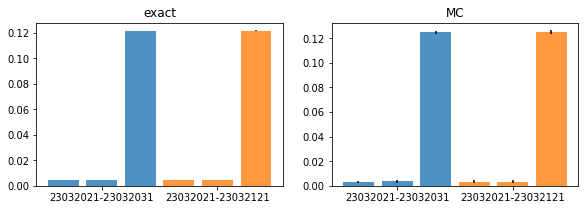

In [47]:
plt.figure(figsize=(15,3))
metrics = ["train-error", "test-error", "mcallester"]
for j, m in enumerate(["exact", "MC"]):
    ax = plt.subplot(131 + j)
    
    for i, s in enumerate(seeds):
        plt.bar(range(i*3, i*3+len(metrics)), [results[m][s]["mcallester"][b][0] for b in metrics], yerr=[results[m][s]["mcallester"][b][1] for b in metrics], label=m, alpha=0.8)
    
    plt.title(m)
    ax.set_xticks([1, 4])
    ax.set_xticklabels(seeds)
#     plt.ylim(0, 0.2)